In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

/home/blevac/anaconda3/envs/edm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def nrmse(x,y):
    num = np.linalg.norm(x-y)
    den = np.linalg.norm(x)
    return num/den

In [5]:
R = 6
ACS_perc = 0.04
sample = 10

## Marginal

In [6]:
file = f'/csiNAS2/slow/brett/multi-contrast_results_7_22_23/DPS_marginal/PD/net-ddpmpp_step-500_lss-2.0e+00_sigmaMax-1.0e+01/ACS_perc{ACS_perc}_R{R}/sample{sample}/seed0/checkpoint.pt'
cont = torch.load(file)
gt_img_1 = cont['gt_img']
marg_recon_1 = cont['recon']

file = f'/csiNAS2/slow/brett/multi-contrast_results_7_22_23/DPS_marginal/PDFS/net-ddpmpp_step-500_lss-2.0e+00_sigmaMax-1.0e+01/ACS_perc{ACS_perc}_R{R}/sample{sample}/seed0/checkpoint.pt'
cont = torch.load(file)
gt_img_2_t = cont['gt_img']
marg_recon_2 = cont['recon']


## Joint

In [8]:
file = f'/csiNAS2/slow/brett/multi-contrast_results_7_22_23/DPS_joint/joint/net-ddpmpp_step-500_lss-2.0e+00_sigmaMax-1.0e+01/ACS_perc{ACS_perc}_R{R}/sample{sample}/seed0/checkpoint.pt'
cont = torch.load(file)

gt_img_1 = cont['gt_img_1']
joint_recon_1 = cont['recon_1']
gt_img_2 = cont['gt_img_2']
joint_recon_2 = cont['recon_2']



file = f'/csiNAS2/slow/brett/multi-contrast_results_7_22_23/DPS_joint/PDFS/net-ddpmpp_step-500_lss-2.0e+00_sigmaMax-1.0e+01/ACS_perc{ACS_perc}_R{R}/sample{sample}/seed0/checkpoint.pt'
cont = torch.load(file)
PDFS_cond_recon = cont['recon_1']

file = f'/csiNAS2/slow/brett/multi-contrast_results_7_22_23/DPS_joint/PD/net-ddpmpp_step-300_lss-2.0e+00_sigmaMax-1.0e+00/ACS_perc{ACS_perc}_R{R}/sample{sample}/seed0/checkpoint.pt'
cont = torch.load(file)
PD_cond_recon = cont['recon_2']

FileNotFoundError: [Errno 2] No such file or directory: '/csiNAS2/slow/brett/multi-contrast_results_7_22_23/DPS_joint/PDFS/net-ddpmpp_step-500_lss-2.0e+00_sigmaMax-1.0e+01/ACS_perc0.04_R6/sample10/seed0/checkpoint.pt'

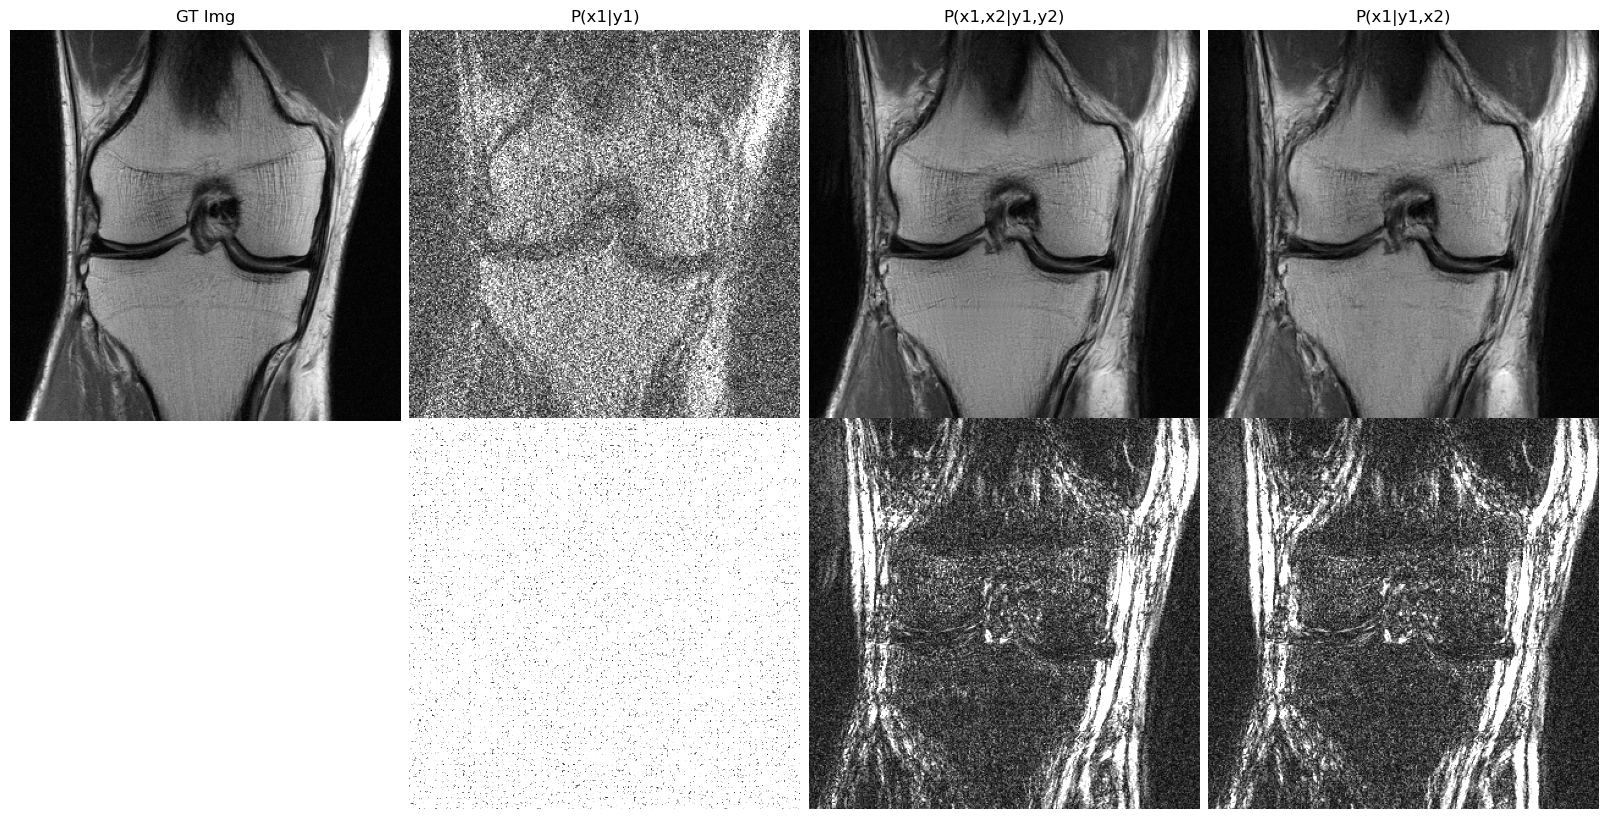

In [9]:
# plot marginal and joint reconstructions for PD and PDFS
vmin = 0.0
vmax = np.percentile(abs(gt_img_1[0,0]),99)
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.title('GT Img')
plt.imshow(np.flipud(abs(gt_img_1[0,0])),cmap='gray',vmin=vmin,vmax=vmax)
plt.axis('off')
plt.subplot(2,4,2)
plt.title('P(x1|y1)')
plt.imshow(np.flipud(abs(marg_recon_1[0,0])),cmap='gray',vmin=vmin,vmax=vmax)
plt.axis('off')
plt.subplot(2,4,3)
plt.title('P(x1,x2|y1,y2)')
plt.imshow(np.flipud(abs(joint_recon_1[0,0])),cmap='gray',vmin=vmin,vmax=vmax)
plt.axis('off')
plt.subplot(2,4,4)
plt.title('P(x1|y1,x2)')
plt.imshow(np.flipud(abs(PDFS_cond_recon[0,0])),cmap='gray',vmin=vmin,vmax=vmax)
plt.axis('off')


plt.subplot(2,4,6)
plt.imshow(np.flipud(abs(gt_img_1[0,0]-marg_recon_1[0,0])),cmap='gray',vmin=vmin,vmax=vmax/5)
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(np.flipud(abs(gt_img_1[0,0]-joint_recon_1[0,0])),cmap='gray',vmin=vmin,vmax=vmax/5)
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(np.flipud(abs(gt_img_1[0,0]-PDFS_cond_recon[0,0])),cmap='gray',vmin=vmin,vmax=vmax/5)
plt.axis('off')
plt.tight_layout(pad=0.2)



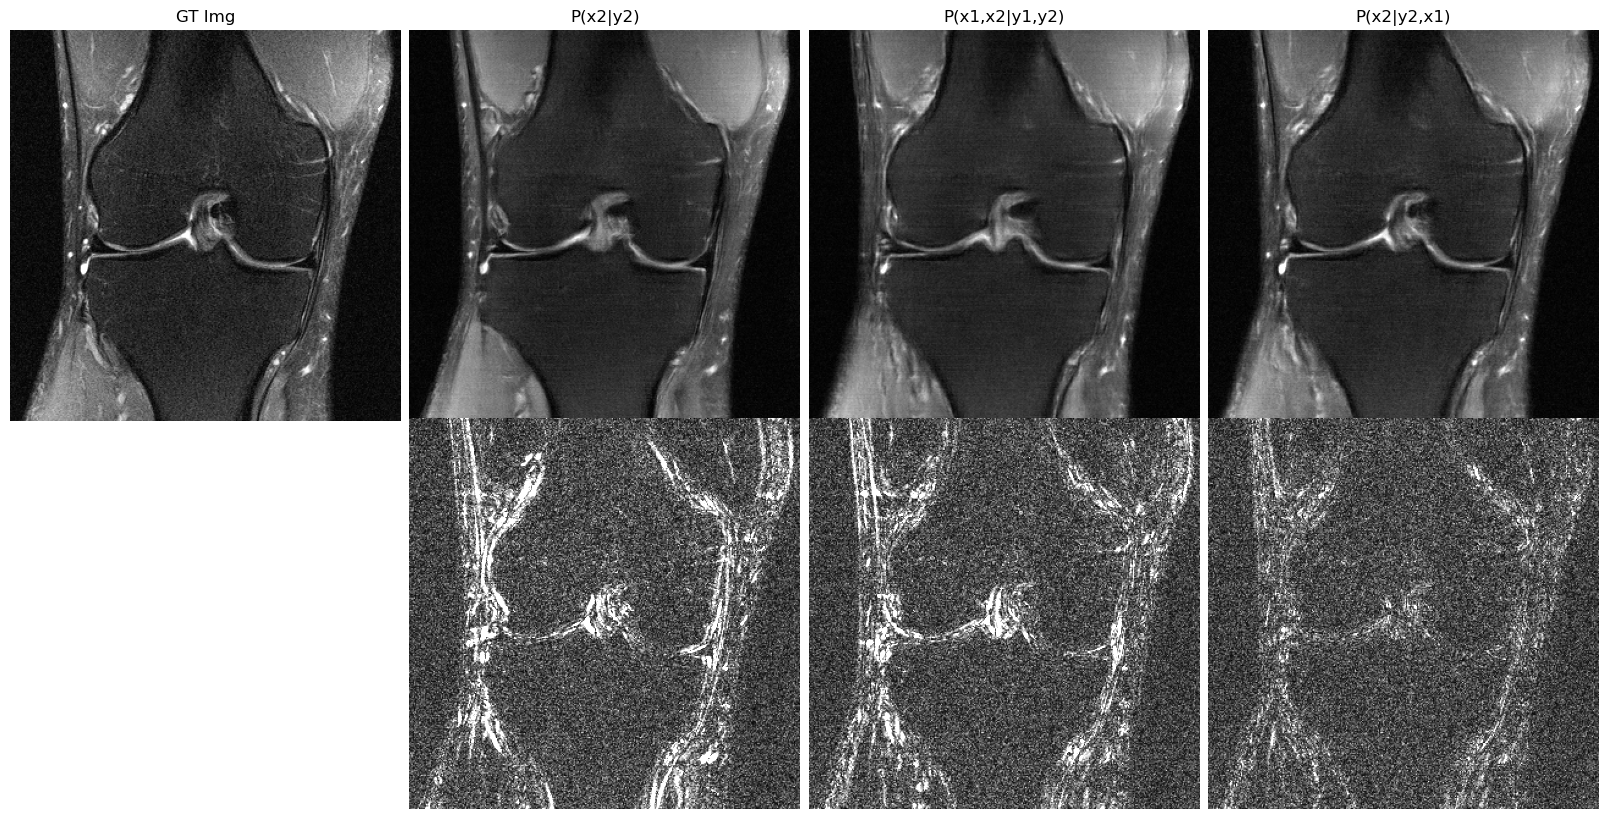

In [123]:
# plot marginal and joint reconstructions for PD and PDFS
vmin = 0.0
vmax = np.percentile(abs(gt_img_2[0,0]),99.9)
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.title('GT Img')
plt.imshow(np.flipud(abs(gt_img_2[0,0])),cmap='gray',vmin=vmin,vmax=vmax)
plt.axis('off')
plt.subplot(2,4,2)
plt.title('P(x2|y2)')
plt.imshow(np.flipud(abs(marg_recon_2[0,0])),cmap='gray',vmin=vmin,vmax=vmax)
plt.axis('off')
plt.subplot(2,4,3)
plt.title('P(x1,x2|y1,y2)')
plt.imshow(np.flipud(abs(joint_recon_2[0,0])),cmap='gray',vmin=vmin,vmax=vmax)
plt.axis('off')
plt.subplot(2,4,4)
plt.title('P(x2|y2,x1)')
plt.imshow(np.flipud(abs(PD_cond_recon[0,0])),cmap='gray',vmin=vmin,vmax=vmax)
plt.axis('off')


plt.subplot(2,4,6)
plt.imshow(np.flipud(abs(gt_img_2_t[0,0]-marg_recon_2[0,0])),cmap='gray',vmin=vmin,vmax=vmax/5)
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(np.flipud(abs(gt_img_2[0,0]-joint_recon_2[0,0])),cmap='gray',vmin=vmin,vmax=vmax/5)
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(np.flipud(abs(gt_img_2[0,0]-PD_cond_recon[0,0])),cmap='gray',vmin=vmin,vmax=vmax/5)
plt.axis('off')
plt.tight_layout(pad=0.2)

In [125]:
print('Marginal')


print('PD')
print('NRMSE:',nrmse(abs(gt_img_1), abs(marg_recon_1)))
print('SSIM:',ssim(abs(gt_img_1[0,0]), abs(marg_recon_1[0,0]), data_range=abs(gt_img_1[0,0]).max() - abs(gt_img_1[0,0]).min()))

print('PDFS')
print('NRMSE',nrmse(abs(gt_img_2), abs(marg_recon_2)))
print('SSIM',ssim(abs(gt_img_2[0,0]), abs(marg_recon_2[0,0]), data_range=abs(gt_img_2[0,0]).max() - abs(gt_img_2[0,0]).min()))


print('Joint')

print('PD')
print('NRMSE',nrmse(abs(gt_img_1), abs(joint_recon_1)))
print('SSIM',ssim(abs(gt_img_1[0,0]), abs(joint_recon_1[0,0]), data_range=abs(gt_img_1[0,0]).max() - abs(gt_img_1[0,0]).min()))

print('PDFS')
print('NRMSE',nrmse(abs(gt_img_2), abs(joint_recon_2)))
print('SSIM',ssim(abs(gt_img_2[0,0]), abs(joint_recon_2[0,0]), data_range=abs(gt_img_2[0,0]).max() - abs(gt_img_2[0,0]).min()))


print('Conditional')
print('PD')
print('NRMSE',nrmse(abs(gt_img_1), abs(PDFS_cond_recon)))
print('SSIM',ssim(abs(gt_img_1[0,0]), abs(PDFS_cond_recon[0,0]), data_range=abs(gt_img_1[0,0]).max() - abs(gt_img_1[0,0]).min()))

print('PDFS')
print('NRMSE',nrmse(abs(gt_img_2), abs(PD_cond_recon)))
print('SSIM',ssim(abs(gt_img_2[0,0]), abs(PD_cond_recon[0,0]), data_range=abs(gt_img_2[0,0]).max() - abs(gt_img_2[0,0]).min()))

Marginal
PD
NRMSE: 0.16326856845755663
SSIM: 0.6660616805976022
PDFS
NRMSE 0.2848187652646267
SSIM 0.5472922034493892
Joint
PD
NRMSE 0.18439554262052685
SSIM 0.6444647001762039
PDFS
NRMSE 0.26293801927631927
SSIM 0.566520105325382
Conditional
PD
NRMSE 0.13804063351184595
SSIM 0.7258655833135101
PDFS
NRMSE 0.20382324972447502
SSIM 0.6478857408773009


## aggregate all results for metrics

In [16]:
import torch
import numpy as np
R = 4


joint_PD = []
joint_PDFS = []
marg_PD = []
marg_PDFS = []
cond_PD =  []
cond_PDFS = []

for sample in range(10):
    joint_file = torch.load('./results/DPS_joint/joint/net-ddpmpp_step-300_lss-2.0e+00/R%d/sample%d/checkpoint.pt'%(R,sample))
    PD_cond_file = torch.load('./results/DPS_joint/PD/net-ddpmpp_step-300_lss-2.0e+00/R%d/sample%d/checkpoint.pt'%(R,sample))
    PDFS_cond_file = torch.load('./results/DPS_joint/PDFS/net-ddpmpp_step-300_lss-2.0e+00/R%d/sample%d/checkpoint.pt'%(R,sample))
    PD_marg_file = torch.load('./results/DPS_marginal/PD/net-ddpmpp_step-300_lss-2.0e+00_sigmaMax-1.0e+00/R%d/sample%d/seed0/checkpoint.pt'%(R,sample))
    # PDFS_marg_file = torch.load('./results/DPS_marginal/PDFS/net-ddpmpp_step-300_lss-2.0e+00_sigmaMax-1.0e+00/R%d/sample%d/seed0/checkpoint.pt'%(R,sample))

    joint_PD.append(joint_file['img1_nrmse'])
    joint_PDFS.append(joint_file['img2_nrmse'])
    marg_PD.append(PD_marg_file['nrmse'])
    # marg_PDFS.append(PDFS_marg_file['nrmse'])
    cond_PD.append(PD_cond_file['img2_nrmse'])
    cond_PDFS.append(PDFS_cond_file['img1_nrmse'])

In [17]:
# print average nrmse for each method
print('PD')
print('Marginal: ', np.mean(marg_PD))
print('Joint: ', np.mean(joint_PD))
print('FS Conditioned: ',np.mean(cond_PDFS))

print('PDFS')
print('Marginal: ', np.mean(marg_PDFS))
print('Joint: ', np.mean(joint_PDFS))
print('FS Conditioned: ',np.mean(cond_PD))

PD
Marginal:  0.10893325565172293
Joint:  0.09996949518039006
FS Conditioned:  0.10140965815740036
PDFS
Marginal:  nan
Joint:  0.18007926157909487
FS Conditioned:  0.1787418812652632


In [8]:
# plot example images
import torch
import numpy as np
sample = 99
R = 14

joint_file = torch.load('./results/DPS_joint/joint/net-ddpmpp_step-300_lss-2.0e+00/R%d/sample%d/checkpoint.pt'%(R,sample))
PD_cond_file = torch.load('./results/DPS_joint/PD/net-ddpmpp_step-300_lss-2.0e+00/R%d/sample%d/checkpoint.pt'%(R,sample))
PDFS_cond_file = torch.load('./results/DPS_joint/PDFS/net-ddpmpp_step-300_lss-2.0e+00/R%d/sample%d/checkpoint.pt'%(R,sample))
PD_marg_file = torch.load('./results/DPS_marginal/PD/net-ddpmpp_step-300_lss-2.0e+00_sigmaMax-1.0e+00/R%d/sample%d/seed0/checkpoint.pt'%(R,sample))
PDFS_marg_file = torch.load('./results/DPS_marginal/PDFS/net-ddpmpp_step-300_lss-2.0e+00_sigmaMax-1.0e+00/R%d/sample%d/seed0/checkpoint.pt'%(R,sample))

joint_PD_img = joint_file['recon_1']
joint_PDFS_img = joint_file['recon_2']
PD_cond_img = PD_cond_file['recon_2']
PDFS_cond_img = PDFS_cond_file['recon_1']
PD_marg_img = PD_marg_file['recon']
PDFS_marg_img = PDFS_marg_file['recon']
PD_gt_img = joint_file['gt_img_1']
PDFS_gt_img = joint_file['gt_img_2']

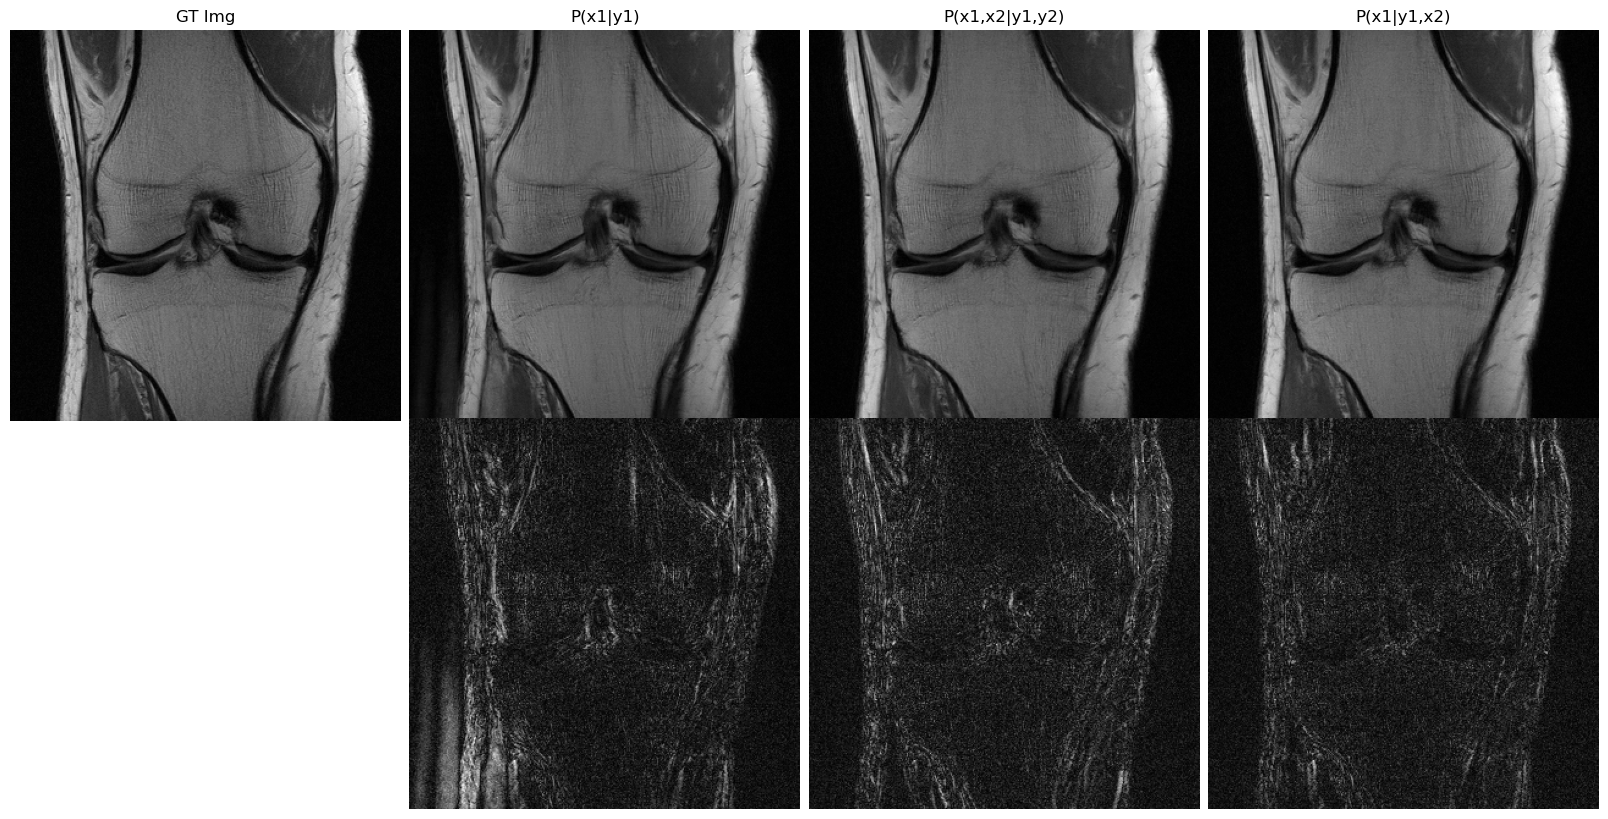

In [12]:
import matplotlib.pyplot as plt
# plot marginal and joint reconstructions for PD and PDFS
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.title('GT Img')
plt.imshow(np.flipud(abs(PD_gt_img[0,0])),cmap='gray')
plt.axis('off')
plt.subplot(2,4,2)
plt.title('P(x1|y1)')
plt.imshow(np.flipud(abs(PD_marg_img[0,0])),cmap='gray')
plt.axis('off')
plt.subplot(2,4,3)
plt.title('P(x1,x2|y1,y2)')
plt.imshow(np.flipud(abs(joint_PD_img[0,0])),cmap='gray')
plt.axis('off')
plt.subplot(2,4,4)
plt.title('P(x1|y1,x2)')
plt.imshow(np.flipud(abs(PDFS_cond_img[0,0])),cmap='gray')
plt.axis('off')


plt.subplot(2,4,6)
plt.imshow(np.flipud(abs(PD_gt_img[0,0]-PD_marg_img[0,0])),cmap='gray')
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(np.flipud(abs(PD_gt_img[0,0]-joint_PD_img[0,0])),cmap='gray')
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(np.flipud(abs(PD_gt_img[0,0]-PDFS_cond_img[0,0])),cmap='gray')
plt.axis('off')
plt.tight_layout(pad=0.2)

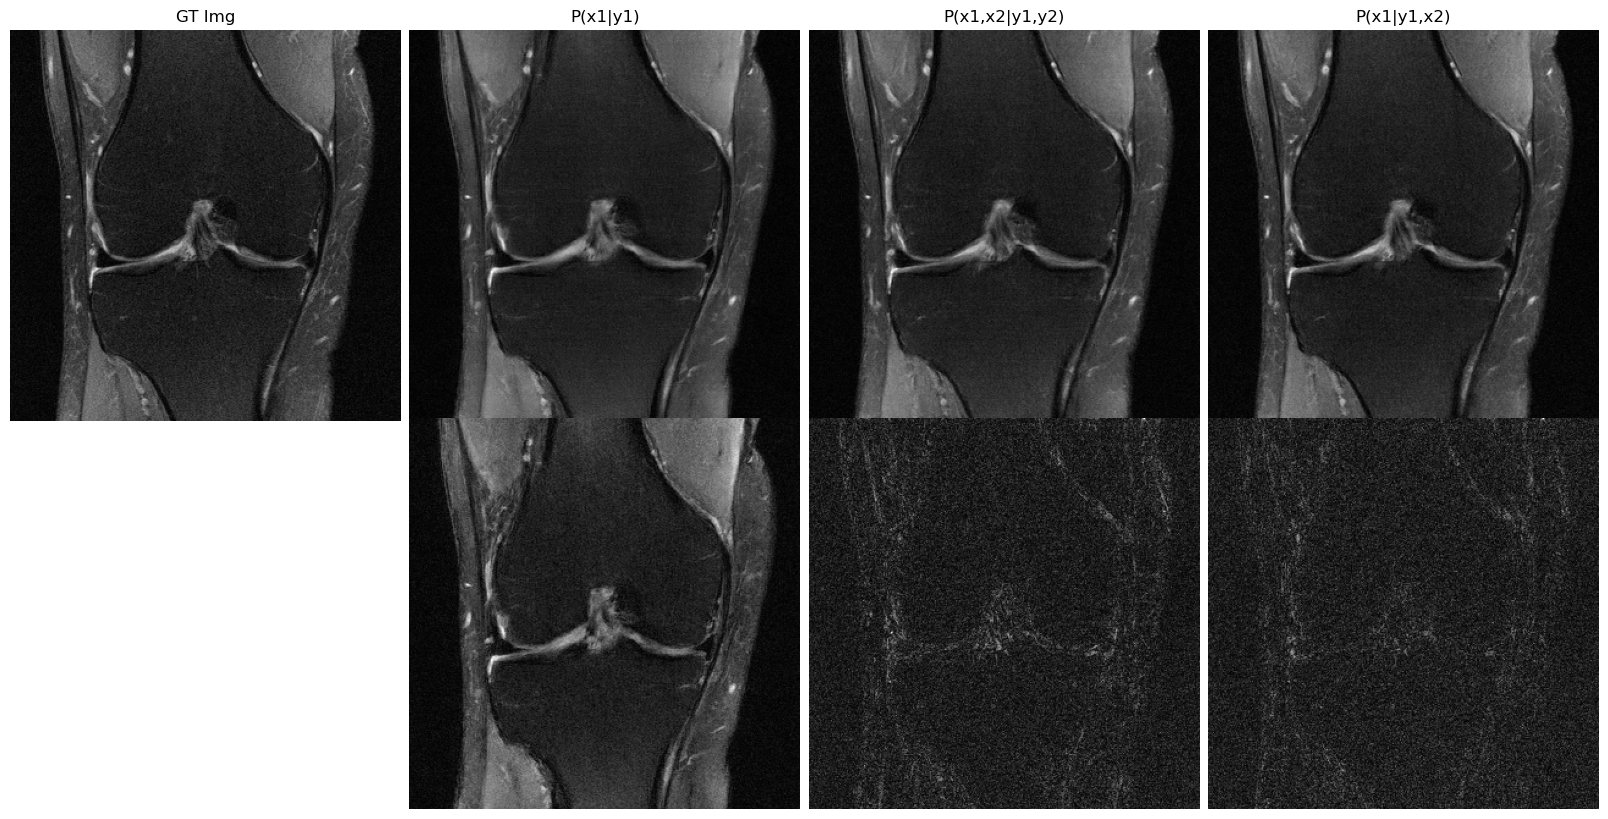

In [13]:
import matplotlib.pyplot as plt
# plot marginal and joint reconstructions for PD and PDFS
plt.figure(figsize=(16,8))
plt.subplot(2,4,1)
plt.title('GT Img')
plt.imshow(np.flipud(abs(PDFS_gt_img[0,0])),cmap='gray')
plt.axis('off')
plt.subplot(2,4,2)
plt.title('P(x1|y1)')
plt.imshow(np.flipud(abs(PDFS_marg_img[0,0])),cmap='gray')
plt.axis('off')
plt.subplot(2,4,3)
plt.title('P(x1,x2|y1,y2)')
plt.imshow(np.flipud(abs(joint_PDFS_img[0,0])),cmap='gray')
plt.axis('off')
plt.subplot(2,4,4)
plt.title('P(x1|y1,x2)')
plt.imshow(np.flipud(abs(PD_cond_img[0,0])),cmap='gray')
plt.axis('off')


plt.subplot(2,4,6)
plt.imshow(np.flipud(abs(PDFS_gt_img[0,0]-PDFS_marg_img[0,0])),cmap='gray')
plt.axis('off')
plt.subplot(2,4,7)
plt.imshow(np.flipud(abs(PDFS_gt_img[0,0]-joint_PDFS_img[0,0])),cmap='gray')
plt.axis('off')
plt.subplot(2,4,8)
plt.imshow(np.flipud(abs(PDFS_gt_img[0,0]-PD_cond_img[0,0])),cmap='gray')
plt.axis('off')
plt.tight_layout(pad=0.2)

## Load all metric and plot

In [1]:
accels = [4,6,8,10,12,14,16]

import torch
import numpy as np

joint_PD_all = []
joint_PDFS_all = []
marg_PD_all = []
marg_PDFS_all = []
cond_PD_all =  []
cond_PDFS_all = []

for R in accels:
    joint_PD = []
    joint_PDFS = []
    marg_PD = []
    marg_PDFS = []
    cond_PD =  []
    cond_PDFS = []

    for sample in range(100):
        joint_file = torch.load('./results/DPS_joint/joint/net-ddpmpp_step-300_lss-2.0e+00/R%d/sample%d/checkpoint.pt'%(R,sample))
        PD_cond_file = torch.load('./results/DPS_joint/PD/net-ddpmpp_step-300_lss-2.0e+00/R%d/sample%d/checkpoint.pt'%(R,sample))
        PDFS_cond_file = torch.load('./results/DPS_joint/PDFS/net-ddpmpp_step-300_lss-2.0e+00/R%d/sample%d/checkpoint.pt'%(R,sample))
        PD_marg_file = torch.load('./results/DPS_marginal/PD/net-ddpmpp_step-300_lss-2.0e+00_sigmaMax-1.0e+00/R%d/sample%d/seed0/checkpoint.pt'%(R,sample))
        PDFS_marg_file = torch.load('./results/DPS_marginal/PDFS/net-ddpmpp_step-300_lss-2.0e+00_sigmaMax-1.0e+00/R%d/sample%d/seed0/checkpoint.pt'%(R,sample))

        joint_PD.append(joint_file['img1_nrmse'])
        joint_PDFS.append(joint_file['img2_nrmse'])
        marg_PD.append(PD_marg_file['nrmse'])
        marg_PDFS.append(PDFS_marg_file['nrmse'])
        cond_PD.append(PD_cond_file['img2_nrmse'])
        cond_PDFS.append(PDFS_cond_file['img1_nrmse'])

    marg_PD_all.append(np.mean(marg_PD))
    joint_PD_all.append(np.mean(joint_PD))
    cond_PDFS_all.append(np.mean(cond_PDFS))

    marg_PDFS_all.append(np.mean(marg_PDFS))
    joint_PDFS_all.append(np.mean(joint_PDFS))
    cond_PD_all.append(np.mean(cond_PD))



/home/blevac/anaconda3/envs/edm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


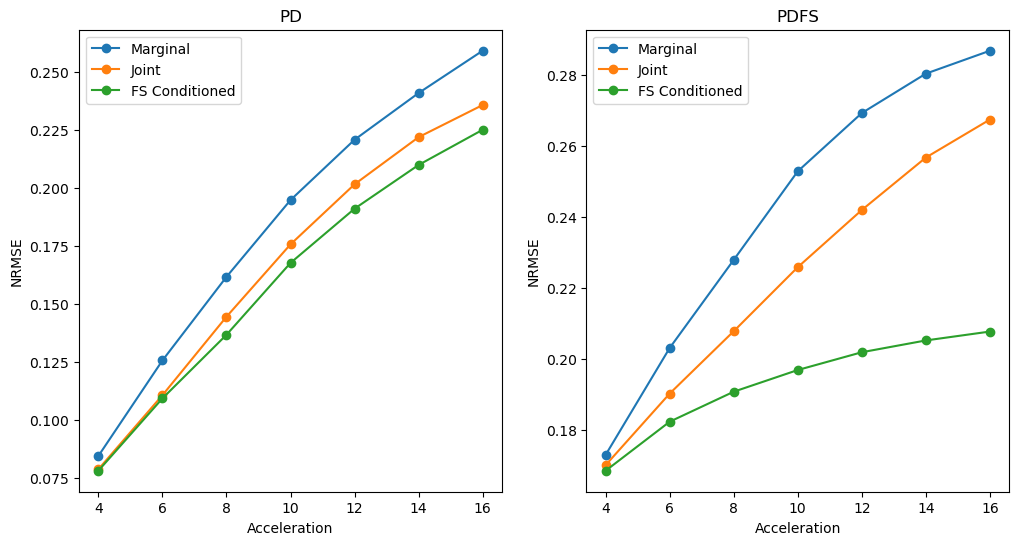

In [2]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(accels, marg_PD_all, '-o', label='Marginal')
plt.plot(accels, joint_PD_all, '-o', label='Joint')
plt.plot(accels, cond_PDFS_all, '-o',label='FS Conditioned')
plt.legend()
plt.title('PD')
plt.xlabel('Acceleration')
plt.ylabel('NRMSE')
plt.subplot(1,2,2)
plt.plot(accels, marg_PDFS_all, '-o', label='Marginal')
plt.plot(accels, joint_PDFS_all, '-o', label='Joint')
plt.plot(accels, cond_PD_all, '-o', label='FS Conditioned')
plt.title('PDFS')
plt.xlabel('Acceleration')
plt.ylabel('NRMSE')
plt.legend()
